In [14]:
##### Import packages
# Basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# To avoid warnings
import warnings
warnings.filterwarnings("ignore")

In [15]:
df=pd.read_csv('energy_data.csv')

In [16]:
df

,id_,mod_acc_sum,mod_acc_percentile_25,mod_acc_percentile_75,mod_acc_mean,mod_acc_median,mod_jerk_sum,mod_jerk_percentile_25,mod_jerk_percentile_75,mod_jerk_mean,mod_jerk_median,date_Hr,value_Hr,startDate_energy,endDate_energy,totalTime_energy,value_energy
0,0,1043.220073,0.995411,1.009186,1.003096,1.004628,32.751422,0.008332,0.036585,0.031492,0.018499,2020-03-30 12:45:36,53.0000,2020-03-30 12:44:59,2020-03-30 12:46:01,62.0,0.317
1,1,1062.119013,0.995555,1.037425,1.021268,1.008131,148.592177,0.025989,0.186147,0.142877,0.082003,2020-03-30 12:45:36,53.0000,2020-03-30 12:47:03,2020-03-30 12:48:05,62.0,0.335
2,2,1047.105327,0.995010,1.007831,1.006832,1.000783,80.642615,0.014164,0.062698,0.077541,0.026917,2020-03-30 12:45:36,53.0000,2020-03-30 12:48:56,2020-03-30 12:49:58,62.0,0.276
3,3,1043.340073,0.994491,1.008151,1.003212,1.004660,28.341771,0.004286,0.020944,0.027252,0.009040,2020-03-30 12:45:36,53.0000,2020-03-30 12:49:58,2020-03-30 12:51:00,62.0,0.648
4,4,1050.852598,1.006196,1.011126,1.010435,1.009513,47.547551,0.004569,0.026014,0.045719,0.008492,2020-03-30 12:51:38,49.0000,2020-03-30 12:51:00,2020-03-30 12:52:02,62.0,0.263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,1396,1043.438559,0.964027,1.022049,1.003306,0.993136,119.362367,0.019951,0.143592,0.114772,0.059097,2020-04-25 23:51:02,67.0000,2020-04-25 23:54:20,2020-04-25 23:55:22,62.0,0.546
1397,1397,1050.242694,0.995207,1.010991,1.009849,0.997482,126.172786,0.002457,0.154333,0.121320,0.036943,2020-04-25 23:51:02,67.0000,2020-04-25 23:55:22,2020-04-25 23:56:24,62.0,0.479
1398,1398,1029.323949,0.987261,0.991333,0.989735,0.989282,18.639718,0.004012,0.010716,0.017923,0.006141,2020-04-26 00:07:02,62.0000,2020-04-26 00:06:12,2020-04-26 00:07:14,62.0,0.126
1399,1399,1041.983537,0.997301,1.003573,1.001907,1.000854,31.715524,0.005222,0.018557,0.030496,0.008402,2020-04-26 00:07:02,62.0000,2020-04-26 00:08:57,2020-04-26 00:09:59,62.0,0.126


In [17]:
##### Defining MAPE(Mean Absolute Percentage Error)

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [18]:
##### Columns based on time, change the format

for col in ['date_Hr', 'startDate_energy', 'endDate_energy']:
    df[col] = pd.to_datetime(df[col])

In [19]:
#Creating new columns of time
df["time_elapsed"] = (df["startDate_energy"] - df["date_Hr"]).astype('timedelta64[s]')
df["day"] = df.date_Hr.apply(lambda x: x.day)
df["month"] = df.date_Hr.apply(lambda x: x.month)
df["hour"] = df.date_Hr.apply(lambda x: x.hour)

df.drop(['date_Hr', 'startDate_energy', 'endDate_energy','totalTime_energy'], axis=1, inplace=True)
df.head(10)

,id_,mod_acc_sum,mod_acc_percentile_25,mod_acc_percentile_75,mod_acc_mean,mod_acc_median,mod_jerk_sum,mod_jerk_percentile_25,mod_jerk_percentile_75,mod_jerk_mean,mod_jerk_median,value_Hr,value_energy,time_elapsed,day,month,hour
0,0,1043.220073,0.995411,1.009186,1.003096,1.004628,32.751422,0.008332,0.036585,0.031492,0.018499,53.0,0.317,-37.0,30,3,12
1,1,1062.119013,0.995555,1.037425,1.021268,1.008131,148.592177,0.025989,0.186147,0.142877,0.082003,53.0,0.335,87.0,30,3,12
2,2,1047.105327,0.995010,1.007831,1.006832,1.000783,80.642615,0.014164,0.062698,0.077541,0.026917,53.0,0.276,200.0,30,3,12
3,3,1043.340073,0.994491,1.008151,1.003212,1.004660,28.341771,0.004286,0.020944,0.027252,0.009040,53.0,0.648,262.0,30,3,12
4,4,1050.852598,1.006196,1.011126,1.010435,1.009513,47.547551,0.004569,0.026014,0.045719,0.008492,49.0,0.263,-38.0,30,3,12
5,5,1043.775302,0.989593,1.006319,1.003630,0.996301,90.054031,0.015956,0.071213,0.086590,0.034841,49.0,0.228,75.0,30,3,12
6,6,1045.862787,0.998421,1.011130,1.005637,1.004987,57.600222,0.023668,0.067691,0.055385,0.038419,49.0,0.199,158.0,30,3,12
7,7,1041.725424,0.992843,1.010761,1.001659,1.001656,62.904923,0.021058,0.059708,0.060486,0.034296,49.0,0.226,302.0,30,3,12
8,8,1051.172611,1.002127,1.009890,1.010743,1.005352,49.988959,0.006588,0.031337,0.048066,0.014098,54.0,0.370,-39.0,30,3,12
9,9,1043.020955,0.996591,1.007516,1.002905,1.003037,44.513934,0.011331,0.051502,0.042802,0.028264,54.0,0.259,23.0,30,3,12


## Modelling

In [20]:
#target 
target= "value_energy"

#features
features=list(df.columns)
features.remove("id_")
features.remove("value_energy")

#Division
X = df[features].values
y = df[target].values

#Dividimos en dos conjuntos de datos para entrenar i testear los modelos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


## Decision Tree

In [25]:
model = DecisionTreeRegressor()

params = {'criterion':['mae'],
        'max_depth': [4,5,6,7],
        'max_features': [7,8,9,10], 
        'max_leaf_nodes': [30,40,50], 
        'min_impurity_decrease' : [0.0005,0.001,0.005], 
        'min_samples_split': [2,4]}

# GridSearch
grid_solver = GridSearchCV(estimator = model, 
                   param_grid = params,
                   scoring = 'neg_median_absolute_error',
                   cv = 10,
                   refit = 'neg_median_absolute_error',
                   verbose = 0)

model_result = grid_solver.fit(X_train,y_train)

reg = model_result.best_estimator_
reg.fit(X,y)

DecisionTreeRegressor(criterion='mae', max_depth=5, max_features=10,
                      max_leaf_nodes=50, min_impurity_decrease=0.001)

In [26]:
print(model_result.best_params_)

{'criterion': 'mae', 'max_depth': 5, 'max_features': 10, 'max_leaf_nodes': 50, 'min_impurity_decrease': 0.001, 'min_samples_split': 2}


In [30]:

best_model=model_result.best_estimator_
#best model
final_model=best_model.fit(X,y)


# features importances
len(df[features].columns)
len(final_model.feature_importances_)
importances=pd.DataFrame([df[features].columns,final_model.feature_importances_], index=["feature","importance"]).T
importances.sort_values('importance', ascending=False)


,feature,importance
0,mod_acc_sum,0.500225
1,mod_acc_percentile_25,0.355598
11,time_elapsed,0.028405
8,mod_jerk_mean,0.021959
9,mod_jerk_median,0.020011
7,mod_jerk_percentile_75,0.018055
3,mod_acc_mean,0.016795
2,mod_acc_percentile_75,0.015907
6,mod_jerk_percentile_25,0.015495
13,month,0.007549


## Random Forest

To do the CV of this model we will use a param_grid based on the results of the decision tree, because the random forest is born from the "trade-off" between bias and variance. The tree has a low bias but a high variance, so we will try to combine models with a low bias and that are not fully correlated to reduce the variance.

In [ ]:
##### Activity Intensity
In addition to calculate the energy expenditure, for each time interval, the level of intensity of the activity carried out must be calculated. . The classification of the intensity level is based on the metabolic equivalents or METS (kcal/kg*h) of the activity being:light activity < 3 METS, moderate 3 - 6 METS and intense > 6 METS. . To estimate it, I consider a person of 75 kg. The model chosen is the Random Forest Regressor which has the lowest MAPE.

reg = RandomForestRegressor(criterion='mae', max_depth=8, max_features=12,
                      max_leaf_nodes=30, min_impurity_decrease=0.001,
                      n_estimators=15)
reg.fit(X,y)

yhat = reg.predict(X)

ids = df_acc_final['id_'].to_frame()
ids['yhat'] = yhat
ids['METs'] = ids["yhat"] / (75 * 62 / 3600)

conditions = [(ids["METs"] < 3 ),((3 < ids["METs"]) & (ids["METs"] < 6)),(ids["METs"] > 6)]
names = ['ligera', 'moderada', 'intensa']
ids['intensidad'] = np.select(conditions, names)

ids

In [22]:
model = RandomForestRegressor()

params = {'bootstrap': [True],
        'criterion':['mae'],
        'max_depth': [8,10],
        'max_features': [10,12],
        'max_leaf_nodes': [10,20,30],
        'min_impurity_decrease' : [0.001,0.01],
        'min_samples_split': [2,4],
        'n_estimators': [10,15]}

# GridSearch
grid_solver = GridSearchCV(estimator = model, 
                   param_grid = params,
                   scoring = 'neg_median_absolute_error',
                   cv = 7,
                   refit = 'neg_median_absolute_error',
                   verbose = 0)

model_result = grid_solver.fit(X_train,y_train)

reg = model_result.best_estimator_
reg.fit(X,y)

RandomForestRegressor(criterion='mae', max_depth=8, max_features=10,
                      max_leaf_nodes=30, min_impurity_decrease=0.001,
                      min_samples_split=4, n_estimators=10)

In [23]:
##### Mean Absolute Percentage Error

yhat = reg.predict(X_test)
print("Mean Absolute Percentage Error = %.2f" %mean_absolute_percentage_error(yhat,y_test),'%')

Mean Absolute Percentage Error = 26.32 %


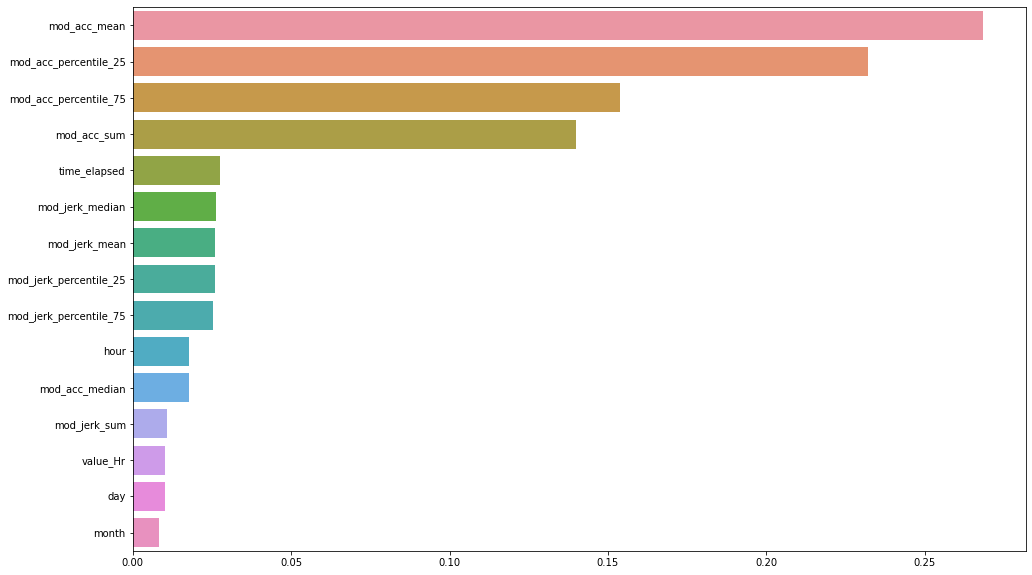

In [24]:
##### Feature Importance

features_importance = reg.feature_importances_
features_array = np.array(features)
features_array_ordered = features_array[(features_importance).argsort()[::-1]]
features_array_ordered

plt.figure(figsize=(16,10))
sns.barplot(y = features_array, x = features_importance, orient='h', order=features_array_ordered[:50])

plt.show()

## Activity Intensity
 
In addition to calculate the energy expenditure, for each time interval, the level of intensity of the activity carried out must be calculated. The classification of the intensity level is based on the metabolic equivalents or METS (kcal/kg*h) of the activity being:
 
light activity < 3 METS, moderate 3 - 6 METS and intense > 6 METS. 
 
To estimate it, I consider a person of 75 kg. The model chosen is the Random Forest Regressor which has the lowest MAPE.

In [33]:
df

,id_,mod_acc_sum,mod_acc_percentile_25,mod_acc_percentile_75,mod_acc_mean,mod_acc_median,mod_jerk_sum,mod_jerk_percentile_25,mod_jerk_percentile_75,mod_jerk_mean,mod_jerk_median,value_Hr,value_energy,time_elapsed,day,month,hour
0,0,1043.220073,0.995411,1.009186,1.003096,1.004628,32.751422,0.008332,0.036585,0.031492,0.018499,53.0000,0.317,-37.0,30,3,12
1,1,1062.119013,0.995555,1.037425,1.021268,1.008131,148.592177,0.025989,0.186147,0.142877,0.082003,53.0000,0.335,87.0,30,3,12
2,2,1047.105327,0.995010,1.007831,1.006832,1.000783,80.642615,0.014164,0.062698,0.077541,0.026917,53.0000,0.276,200.0,30,3,12
3,3,1043.340073,0.994491,1.008151,1.003212,1.004660,28.341771,0.004286,0.020944,0.027252,0.009040,53.0000,0.648,262.0,30,3,12
4,4,1050.852598,1.006196,1.011126,1.010435,1.009513,47.547551,0.004569,0.026014,0.045719,0.008492,49.0000,0.263,-38.0,30,3,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,1396,1043.438559,0.964027,1.022049,1.003306,0.993136,119.362367,0.019951,0.143592,0.114772,0.059097,67.0000,0.546,198.0,25,4,23
1397,1397,1050.242694,0.995207,1.010991,1.009849,0.997482,126.172786,0.002457,0.154333,0.121320,0.036943,67.0000,0.479,260.0,25,4,23
1398,1398,1029.323949,0.987261,0.991333,0.989735,0.989282,18.639718,0.004012,0.010716,0.017923,0.006141,62.0000,0.126,-50.0,26,4,0
1399,1399,1041.983537,0.997301,1.003573,1.001907,1.000854,31.715524,0.005222,0.018557,0.030496,0.008402,62.0000,0.126,115.0,26,4,0


In [47]:
reg = RandomForestRegressor(criterion='mae', max_depth=8, max_features=12,
                      max_leaf_nodes=30, min_impurity_decrease=0.001,
                      n_estimators=15)
reg.fit(X,y)

yhat = reg.predict(X)

ids = df['id_'].to_frame()
ids['yhat'] = yhat
ids['METs'] = ids["yhat"] / (75 * 62 / 3600)

conditions = [(ids["METs"] < 3 ),((3 < ids["METs"]) & (ids["METs"] < 6)),(ids["METs"] > 6)]
names = ['light', 'moderate', 'intense']
ids['intensity'] = np.select(conditions, names)

ids

,id_,yhat,METs,intensity
0,0,0.337367,0.261187,light
1,1,0.581400,0.450116,light
2,2,0.340233,0.263406,light
3,3,0.258667,0.200258,light
4,4,0.283933,0.219819,light
...,...,...,...,...
1396,1396,0.402067,0.311277,light
1397,1397,0.393167,0.304387,light
1398,1398,0.258667,0.200258,light
1399,1399,0.278200,0.215381,light


The substantial improvement that can be seen when we introduce the non-linearity of the model invites us to deduce that the relationships between the variables and the target are not linear. More efforts should be made to collect all the information on physical activity. Additional information about individuals such as age, sex and weight would help to improve the ASM of the model in several points.
